# PUNTOS A REALIZAR (FUNCIONES)


# 1. Cargar Datos.
## Cargar los datos en Pandas DataFrames, asegurándose de conectar el volumen de datos en comparación del valor o capitalización en dólares para el mercado, intentando analizar el comportamiento proporcional entre ambos


# 2. Preprocesado de datos
## Realizar un preprocesado de datos identificando los valores faltantes o nulos, su corrección, y el cambio del tipo de datos (astype); además con el comando str.upper() poner los index en mayúsculas, separar por grupos (usar comando groupby) dependiendo del valor de mercado en la fecha 1 de Enero de 2015 y organizarlos por valor ascendente.

# 3.Graficar en una sola figura y varios subplots el precio de las 4 criptomonedas más interesantes para usted en el año 2015

# 4.	Calcular la media de las criptomonedas para el año 2015 y seleccionar la desviación estándar menor entre ellas.

# 5.	Determinar cuáles criptomonedas están por encima de la media.

# 6.	En los últimos tres meses del año 2015, determine cuáles fueron las criptomonedas que tuvieron un mayor valor en el mercado.

# 7. Cuál fue la moneda más volátil; es decir, que moneda tuvo la mayor cantidad de fluctuaciones en el 2015.
# 8. Cuál fue la moneda más estable; es decir, que moneda tuvo mayor estabilidad en el 2015.

# Menu Principal (Main)

________MENÚ PRINCIPAL_______ 

1. Comparar Monedas por Volumen y MarketCap
2. Ver valor de mercado del 1 de enero de 2015
3. Las 4 Criptomonedas más interesantes del 2015
4. Media de las criptomonedas para el año 2015 y su desviación estándar menor
5. Criptomonedas por encima de la media
6. Criptomonedas con mayor valor en los ultimos 3 meses de 2015
7. Moneda más vólatil
8. Moneda más estable
9. Salir
Elija una opción: 
3


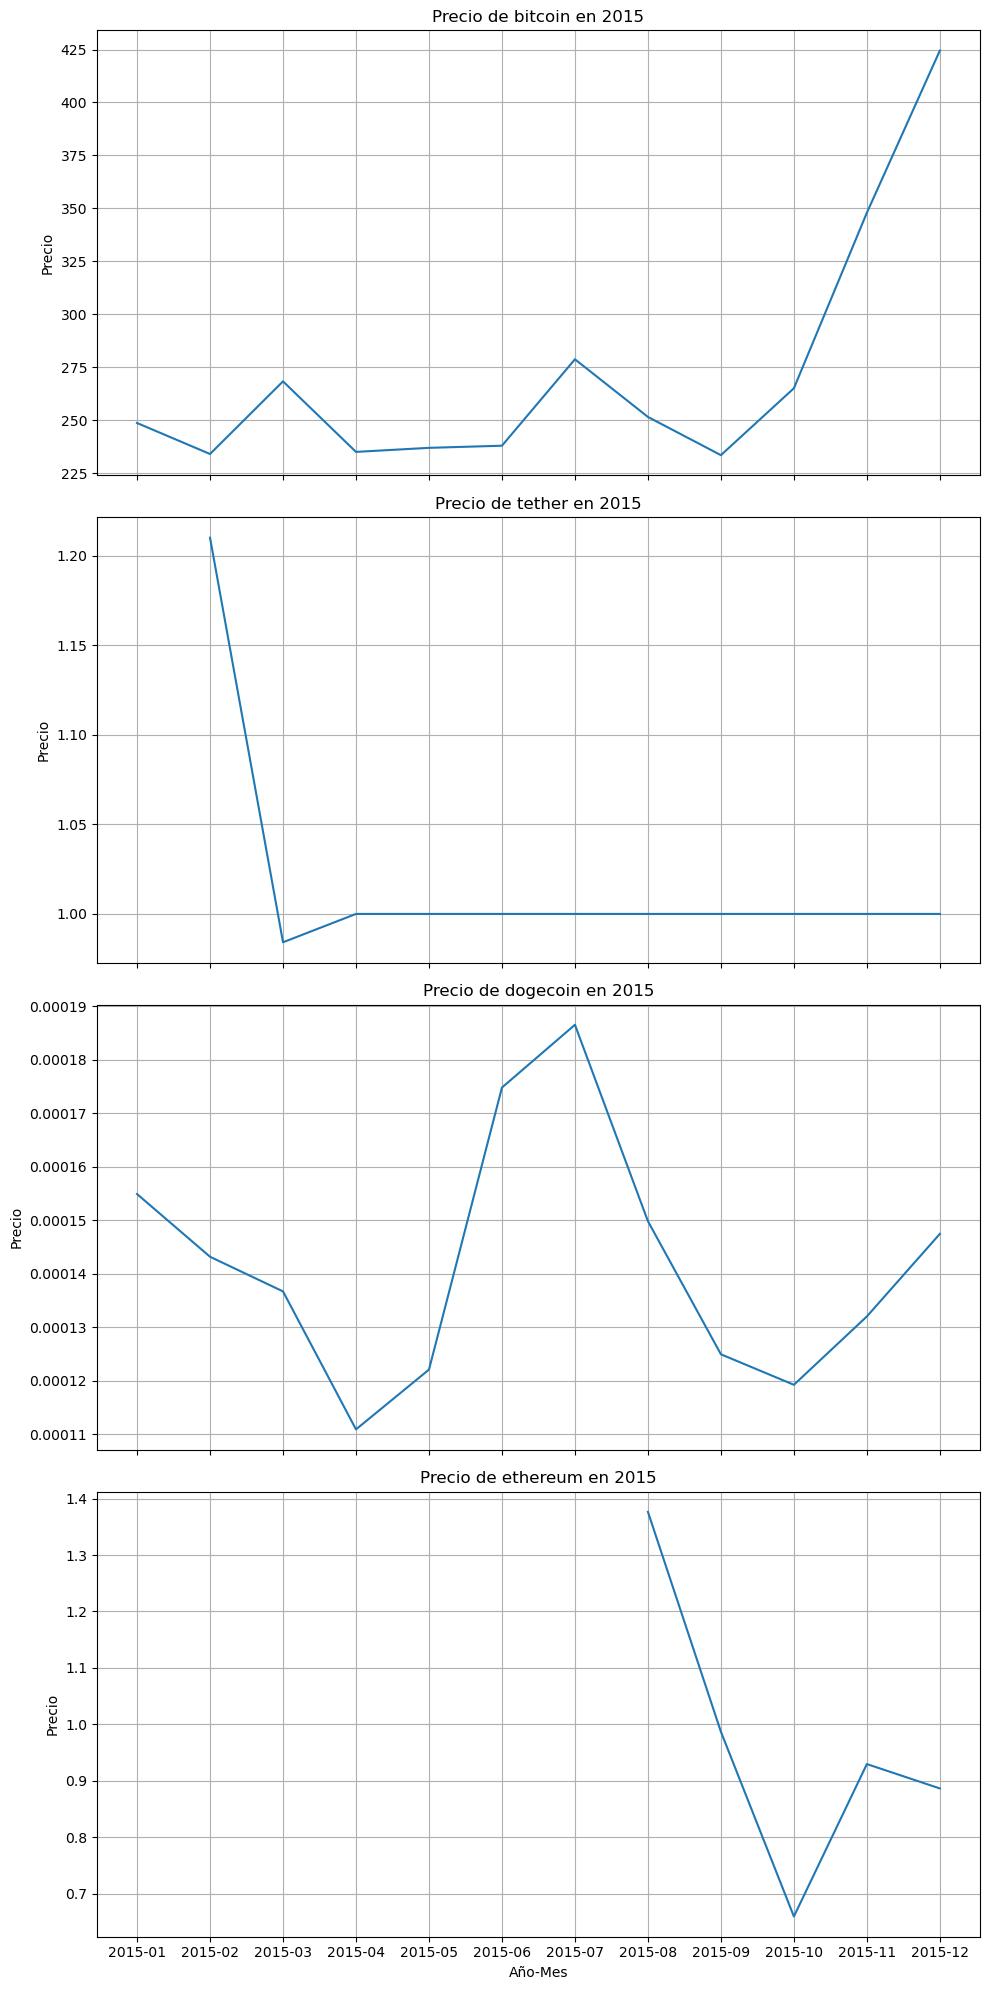

________MENÚ PRINCIPAL_______ 

1. Comparar Monedas por Volumen y MarketCap
2. Ver valor de mercado del 1 de enero de 2015
3. Las 4 Criptomonedas más interesantes del 2015
4. Media de las criptomonedas para el año 2015 y su desviación estándar menor
5. Criptomonedas por encima de la media
6. Criptomonedas con mayor valor en los ultimos 3 meses de 2015
7. Moneda más vólatil
8. Moneda más estable
9. Salir


In [ ]:
import pandas as pd
import os
import glob
from IPython.core.display import HTML

dataframes= []
ruta = 'archive'

def abrir_csv():#______________FUNCION PARA CARGAR LOS DATOS DEL DATAFRAME___________________
    global data_crypto  # Declarar data_crypto como global

    #Primero cargamos los datos para convertirlos en dataframes
    files = glob.glob(os.path.join(ruta, '*.csv'))
    for file in files:
        df = pd.read_csv(file, delimiter=',')  
        dataframes.append(df)

    #Concatenamos los dataframes
    data_crypto = pd.concat(dataframes)

    return data_crypto
    

def cargarDatos():#____________FUNCION 1_________________
    
    abrir_csv()

    # Concatenar todos los DataFrames en uno solo, en caso de necesitar usarlo
    data_crypto = pd.concat(dataframes)


    # Ahora puedes imprimir la información del DataFrame
    print("___________________________data crypto_____________________________")
    data_crypto.info()
    
    
    print("___________________________MONEDAS CON MAS VOLUMEN DE MERCADO_____________________________")
    display(HTML(data_crypto.sort_values(by=['total_volume'], ascending=[False]).head(10).to_html())) # print
    print("___________________________MONEDAS CON MAS MARKET CAP_____________________________")
    display(HTML(data_crypto.sort_values(by=['market_cap'], ascending=[False]).head(10).to_html())) # print

    
    
    
    
def preprocesarDatos():#______________FUNCION 2________________
    
    abrir_csv()
    #Usamos el groupby para agrupar los dataframes por la columna de fecha
    data_fecha = data_crypto.groupby('date')
    data_por_fecha = []

    #Usamos un for para iterar por el dataframe agrupado
    for key, group in data_fecha:
        #Verificamos si en el dataframe existe la fecha 01 de enero de 2015
        if key == "2015-01-01 00:00:00.000":
            #Si existe esa fecha, agregamos ese dataframe a una variable que almacenara todos los dataframes
            data_por_fecha.append(group)

    #Concatenamos todos los dataframes que tienen la fecha 1 de enero de 2015
    data_filtrada = pd.concat(data_por_fecha)
    
    #Identificamos y eliminamos los valores nulos
    data_filtrada.dropna(how="any", axis=0)
    
    #Usamos el astype() para poder cambiar los index a str y por lo tanto poder usar str.upper()
    data_filtrada.index = data_filtrada.index.astype(str).str.upper()

    #Usamos el str.upper() para volver mayúsculas las columnas
    data_filtrada.columns = data_filtrada.columns.str.upper()
    
    #Imprimimos el dataframe ya filtrado por valor de mercado en la fecha 1 de enero de 2015
    print("___________________________VALOR DE MERCADO 1 DE ENERO DE 2015_____________________________")
    display(HTML(data_filtrada.sort_values(by='MARKET_CAP', ascending=True).to_html()))


import matplotlib.pyplot as plt
import pandas as pd




def graficar_2015():#______________FUNCION 3________________
    
    abrir_csv()
    
    data_2015 = data_crypto[data_crypto["date"].str.startswith("2015")].copy()
    monedas_interesantes = ["bitcoin", "tether", "dogecoin", "ethereum"]
    
    data_2015['date'] = pd.to_datetime(data_2015['date'])  # columna "date" a tipo datetime
    
    data_2015['year_month'] = data_2015['date'].dt.to_period('M').astype(str)   # nueva columna con solo año y mes
    
    # agrupar por el year_month y coin_name para sacar la media de cada mes
    data_media = data_2015.groupby(['year_month', 'coin_name'])['price'].mean().reset_index()
    
    # graficar
    fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)
    
    for i, moneda in enumerate(monedas_interesantes):
        data_moneda = data_media[data_media["coin_name"] == moneda] #adjuntar las cifra de los meses de cada moneda
    
        axs[i].plot(data_moneda["year_month"], data_moneda["price"])
        axs[i].set_title(f"Precio de {moneda} en 2015")
        axs[i].set_ylabel("Precio")
        axs[i].grid(True)
    
    plt.xlabel("Año-Mes")
    plt.tight_layout()
    plt.show()
    
    
    
    
def crear_html(a, m, d):#_________________FUNCION 4_______________________
    # HTML y CSS para dar estilo a la salida
    html_style = """
    <style>
        table {
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
            margin-left: auto;
            margin-right: auto;
        }

        th {
            background-color: #f2f2f2;
            padding: 8px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }
        
        h3 {
            background-color: #f2f2f2;
            padding: 8px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }
        
        td {
            padding: 8px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }

        tr:hover {
            background-color: #f2f2f2;
        }
    </style>
    """
    html_table = f"""
    {html_style}
    <h4>La media es :{a:.2f}
    </h4>
    <br>
    <div style="text-align: center;">
        <table>
            <tr>
                <th>Criptomoneda</th>
                <th>Desviación Estándar</th>
            </tr>
            <tr>
                <td>{m}</td>
                <td>{d:.7f}</td>
            </tr>
        </table>
    </div>
    """
    return html_table




    #metodo para calcular la media
def calcular_media_2015():#_________________FUNCION 4__________________
    abrir_csv()
    data_2015 = data_crypto[data_crypto['date'].str.startswith('2015')]
    media = data_2015['price'].mean()
    return media




    #metodo para calcular la desviacion estandar y imprimir la media
def Media_desviasion_2015():#_____________________FUNCION 4_____________________
    abrir_csv()
    # Filtrar los datos para incluir solo las observaciones del año 2015
    data_2015 = data_crypto[data_crypto['date'].str.startswith('2015')]

    # Agrupar los datos por el nombre de la criptomoneda
    data_agrupada = data_2015.groupby('coin_name')

    # Calcular la media 
    calcular_media_2015()#llama la funcion
    # Calcular la desviación estándar
    crip_desv = data_agrupada['price'].std()

    # Encontrar la criptomoneda con la desviación estándar más baja
    moneda_baja_desviasion = crip_desv.idxmin()
    # el valor mas bajo
    moneda_bajo_valor = crip_desv.min()

    # Crear la cadena HTML
    html_resultados = crear_html(calcular_media_2015(), moneda_baja_desviasion, moneda_bajo_valor)

    display(HTML(html_resultados))
    
    
    
def Mayor_media_2015():#____________FUNCION 5___________
    abrir_csv()
    media = calcular_media_2015()#llama a la funcion para calcular la media
    monedas_arriba_media = data_crypto[data_crypto['price'] > media]#escoge las de mayor precio
    display(HTML(monedas_arriba_media.to_html()))

    
    
def Mayor_cripto_2015():#__________________FUNCION 6________________
    abrir_csv()
    cripto_2015 = data_crypto[data_crypto['date'].str.startswith('2015-10') | 
                               data_crypto['date'].str.startswith('2015-11') | 
                               data_crypto['date'].str.startswith('2015-12')]
    Cripto_mayor = cripto_2015.sort_values(by='market_cap', ascending=False)
    return display(HTML(Cripto_mayor.to_html()))




def volatibilidad(data_crypto):#___________________FUNCION 7______________________
    abrir_csv()
    
    # Convertir la columna 'date' a tipo datetime si no lo está
    data_crypto['date'] = data_crypto['date'].astype(object)
    
    # Agrupar los datos por nombre de moneda y calcular la desviación estándar de los precios
    stds = data_crypto.groupby('coin_name')['price'].std()
    
    # Encontrar la moneda más volátil
    most_volatile_currency = stds.idxmax()
    volatility_value = stds.max()
    
    print("__________Moneda más volatil__________")
    print("La moneda más volátil en 2015 fue:", most_volatile_currency)
    print("Su volatilidad fue de:", volatility_value)
    print("\n")
    
    
    

def estabilidad(data_crypto):#______________FUNCION 8____________________
    
    abrir_csv()
    
    # Convertir la columna 'date' a tipo datetime si no lo está
    data_crypto['date'] = data_crypto['date'].astype(object)
    
    # Agrupar los datos por nombre de moneda y calcular la desviación estándar de los precios
    stds = data_crypto.groupby('coin_name')['price'].std().reset_index(name='volatilidad')
    
    # Encontrar la moneda más estable
    stable_coin = stds.loc[stds['volatilidad'].idxmin()]['coin_name']
    stability_value = stds['volatilidad'].min()
    
    print("__________Moneda más estable__________")
    print("La moneda más estable en 2015 fue:", stable_coin)
    print("Su volatilidad fue de:", stability_value)
    
    
    
    
#_________________________________________________INICIO DEL MAIN________________________________________________________
salir_main = False
abrir_csv()

while salir_main == False:

    print("________MENÚ PRINCIPAL_______ \n")
    print("1. Comparar Monedas por Volumen y MarketCap")
    print("2. Ver valor de mercado del 1 de enero de 2015")
    print("3. Las 4 Criptomonedas más interesantes del 2015")
    print("4. Media de las criptomonedas para el año 2015 y su desviación estándar menor")
    print("5. Criptomonedas por encima de la media")
    print("6. Criptomonedas con mayor valor en los ultimos 3 meses de 2015")
    print("7. Moneda más vólatil")
    print("8. Moneda más estable")
    print("9. Salir")

    opcion_main = input("Elija una opción: \n")
    
    if opcion_main == '1':
        cargarDatos()
    elif opcion_main == '2':
        preprocesarDatos()
    elif opcion_main == '3':
        graficar_2015()
    elif opcion_main == '4':
        Media_desviasion_2015()
    elif opcion_main == '5':
        Mayor_media_2015()
    elif opcion_main == '6':
        Mayor_cripto_2015()
    elif opcion_main == '7':
        volatibilidad(data_crypto)
    elif opcion_main == '8':
        estabilidad(data_crypto)
    elif opcion_main == '9':
        print("Hasta luego!")
        salir_main = True
    else:
        print("Escriba una opción válida")
        
        
